<a href="https://colab.research.google.com/github/pthnhan/DS_KHTN_TimeSeries/blob/main/h.w/TimeSeriesAnalysisAndForcasting_Wiley/2_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2.19**

**Table B.16 presents data on the US Gross Domestic Product (GDP). Plot the GDP data and calculate the sample autocorrelation function and variogram. Is there an indication of nonstationary behavior in the time series? Now plot the first difference of the GDP time series and compute the sample autocorrelation function and variogram of the first differences. What impact has differencing had on the time series?**


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, acf, plot_pacf
!pip install scikit-gstat
import skgstat as skg

In [ ]:
data_2_19 = pd.read_excel("https://github.com/pthnhan/DS_KHTN_TimeSeries/blob/main/data/Time%20Series%20and%20Forecasting%20Appendix%20B%20Tables.xls?raw=true", sheet_name='B.16-GDP', header = 3).set_index('Year')
display(data_2_19.shape)
data_2_19


(74, 2)

,"GDP, Current Dollars, billions","GDP, Real (1996) Dollars, billions"
Year,,
1929,103.7,822.2
1930,91.3,751.5
1931,76.6,703.6
1932,58.8,611.8
1933,56.4,603.3
...,...,...
1998,8781.5,8508.9
1999,9274.3,8859.0
2000,9824.6,9191.4


**Plot data**

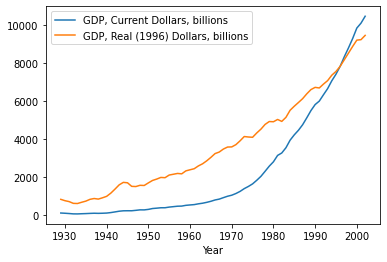

In [ ]:
data_2_19.plot()
plt.show()

**ACF**

GDP, Current Dollars, billions
[ 1.          0.94369095  0.88716853  0.82921223  0.773631    0.71998541
  0.66812525  0.61881766  0.57114784  0.52436058  0.47939975  0.43531071
  0.39236303  0.34886825  0.30660616  0.26661032  0.22877808  0.19220714
  0.15645722  0.12223274  0.09112781  0.06174366  0.03237958  0.00587269
 -0.01903044 -0.04167931 -0.0620629  -0.08066595 -0.09765347 -0.11363083
 -0.12882241 -0.14267233 -0.15561026 -0.16787485 -0.17979914 -0.19113334
 -0.20173385 -0.21195197 -0.22141903 -0.23034902 -0.23871622 -0.24668609
 -0.2542143  -0.26144855 -0.2682776  -0.27432652 -0.28010755 -0.28532962
 -0.28980834 -0.29330773 -0.29604148 -0.29772274 -0.29850951 -0.2976981
 -0.29622053 -0.29391712 -0.29002764 -0.28498492 -0.27920534 -0.27245981
 -0.26424703 -0.25430449 -0.24286204 -0.23047434 -0.21682233 -0.20197057
 -0.18575531 -0.16822376 -0.14910789 -0.12812298 -0.10538671 -0.08094843
 -0.05481241 -0.02795951]


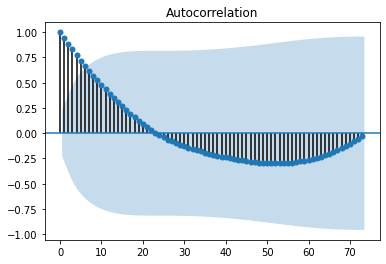

GDP, Real (1996) Dollars, billions
[ 1.          0.95436942  0.90780324  0.85842687  0.81003957  0.76354818
  0.71930641  0.67738352  0.6370939   0.59712451  0.55833861  0.52005795
  0.48252698  0.44350849  0.40514173  0.3689101   0.33471022  0.30092259
  0.26676251  0.23362783  0.20388201  0.17520258  0.1442766   0.11390944
  0.0823125   0.05151069  0.02224724 -0.00513985 -0.03069521 -0.05751177
 -0.08610108 -0.11219821 -0.13663636 -0.16029301 -0.18419727 -0.20740412
 -0.22888477 -0.24939113 -0.26722871 -0.28298167 -0.29640232 -0.30838527
 -0.3191789  -0.3293091  -0.33828681 -0.3447716  -0.35242378 -0.36017297
 -0.36662214 -0.37060361 -0.37373985 -0.3753793  -0.37656656 -0.37583661
 -0.37439353 -0.37212135 -0.36730053 -0.36178093 -0.35784437 -0.35341458
 -0.34625561 -0.33531233 -0.32132058 -0.30557946 -0.28778837 -0.26808932
 -0.24700592 -0.22414897 -0.19838299 -0.16966152 -0.13793222 -0.10407922
 -0.06928787 -0.03490204]


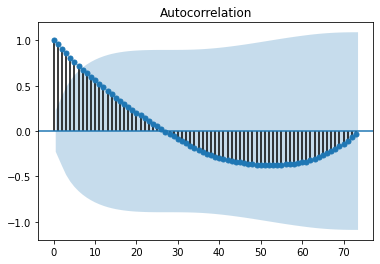

In [38]:
print("GDP, Current Dollars, billions")
acf1 = sm.tsa.stattools.acf(data_2_19['GDP, Current Dollars, billions'], nlags = len(data_2_19)-1,fft=False)
print(acf1)
plot_acf(data_2_19['GDP, Current Dollars, billions'], lags=73)
plt.show()
print("GDP, Real (1996) Dollars, billions")
acf2 = sm.tsa.stattools.acf(data_2_19['GDP, Real (1996) Dollars, billions'], nlags = len(data_2_19)-1,fft=False)
print(acf2)
plot_acf(data_2_19['GDP, Real (1996) Dollars, billions'], lags=73)
plt.show()

**Variogram**

GDP, Current Dollars, billions
spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   73.00
Sill:              26728741.25
Nugget:            0.00
        


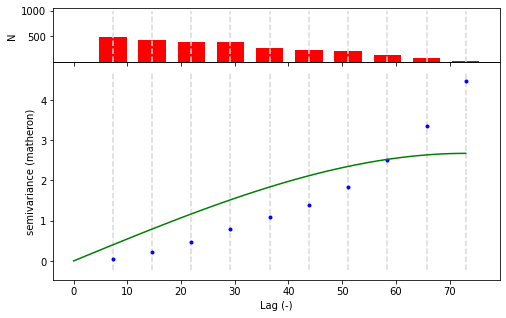

GDP, Real (1996) Dollars, billions
spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   73.00
Sill:              20584856.64
Nugget:            0.00
        


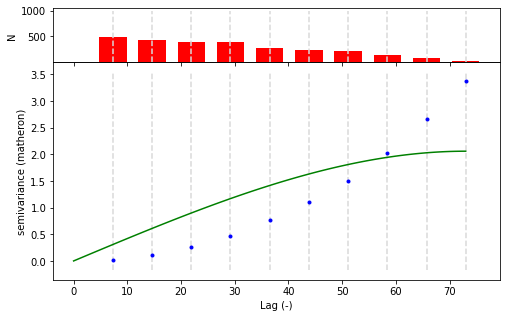

In [39]:
print("GDP, Current Dollars, billions")
v_curr = skg.Variogram(data_2_19.index.tolist(), data_2_19['GDP, Current Dollars, billions'].tolist())
print(v_curr)
v_curr.plot()
plt.show()
print("GDP, Real (1996) Dollars, billions")
v_real = skg.Variogram(data_2_19.index.tolist(), data_2_19['GDP, Real (1996) Dollars, billions'].tolist())
print(v_real)
v_real.plot()
plt.show()

**Is there an indication of nonstationary behavior in the time series?**

...

**Take the first difference of the GDP time series**

In [ ]:
data_2_19_firstdiff = data_2_19.diff().dropna()
data_2_19_firstdiff

,"GDP, Current Dollars, billions","GDP, Real (1996) Dollars, billions"
Year,,
1930,-12.4,-70.7
1931,-14.7,-47.9
1932,-17.8,-91.8
1933,-2.4,-8.5
1934,9.6,65.0
...,...,...
1998,463.1,349.4
1999,492.8,350.1
2000,550.3,332.4


**Plot the first difference of the GDP time series**

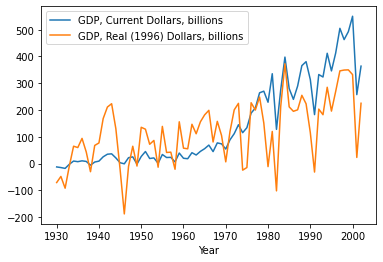

In [41]:
data_2_19_firstdiff.plot()
plt.show()

**ACF of the first differences**

GDP, Current Dollars, billions
[ 1.          0.89377295  0.8649704   0.82158698  0.77026712  0.73288254
  0.66965508  0.61326376  0.6032562   0.55901163  0.53785293  0.50185394
  0.4692047   0.43951847  0.38713348  0.35733297  0.33260449  0.27247955
  0.23930377  0.2135396   0.15045937  0.14203224  0.08617089  0.03946361
  0.00319841 -0.0430329  -0.07331601 -0.10628316 -0.12865719 -0.15398622
 -0.17801537 -0.19654507 -0.21734898 -0.22648923 -0.24372561 -0.26413979
 -0.27340988 -0.28111756 -0.29779102 -0.3124123  -0.32016996 -0.32571094
 -0.33231872 -0.33706447 -0.34051726 -0.34170773 -0.34593073 -0.34206474
 -0.34557395 -0.33418638 -0.32887834 -0.32490484 -0.3107751  -0.31587681
 -0.305583   -0.2846138  -0.27640511 -0.27058844 -0.26151795 -0.24781913
 -0.23403708 -0.22484776 -0.22644163 -0.2106807  -0.19946244 -0.17932973
 -0.16541441 -0.14724807 -0.11923591 -0.09317026 -0.06443404 -0.02909652
 -0.01893883]


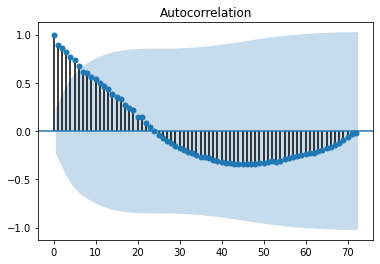

GDP, Real (1996) Dollars, billions
[ 1.00000000e+00  5.07459877e-01  2.89313289e-01  1.53887786e-01
  9.37081900e-02  1.67409227e-01  1.37100228e-01  1.48311349e-01
  2.16086266e-01  1.23738838e-01  1.55116682e-01  2.04645164e-01
  1.81269207e-01  1.63534102e-01  1.51213130e-01  1.44643973e-01
  1.71803955e-01  2.02345684e-02 -2.44053418e-02  3.26963451e-02
  1.32644527e-02  1.82079567e-01  1.20886531e-01  4.78944740e-02
  7.65954423e-02  9.42182860e-03  3.50155492e-02 -4.90430188e-02
  2.04534618e-02  3.41069762e-03 -4.36243098e-02 -5.54402018e-02
 -1.03314658e-01  1.65693313e-03  2.88788855e-02 -4.97079470e-03
  1.34007385e-03 -4.06372983e-02 -1.81957892e-01 -2.02196852e-01
 -1.74474969e-01 -1.35125948e-01 -7.96171442e-02 -4.81184303e-02
 -1.78717775e-02 -3.84780088e-02 -1.58806866e-01 -1.13204249e-01
 -1.59193988e-01 -1.11229263e-01 -1.12851778e-01 -1.75042902e-01
 -1.52744430e-01 -1.89697031e-01 -1.58046112e-01 -5.19057487e-02
 -6.14975941e-02 -5.87080965e-02 -6.12081149e-02 -6.552

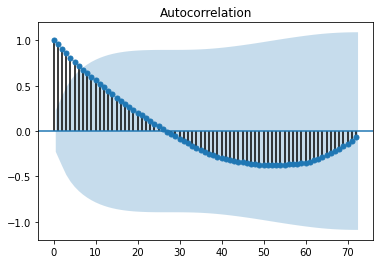

In [42]:
print("GDP, Current Dollars, billions")
acf1_firstdiff = sm.tsa.stattools.acf(data_2_19_firstdiff['GDP, Current Dollars, billions'], nlags = len(data_2_19_firstdiff)-1,fft=False)
print(acf1_firstdiff)
plot_acf(data_2_19_firstdiff['GDP, Current Dollars, billions'], lags=72)
plt.show()
print("GDP, Real (1996) Dollars, billions")
acf2_firstdiff = sm.tsa.stattools.acf(data_2_19_firstdiff['GDP, Real (1996) Dollars, billions'], nlags = len(data_2_19_firstdiff)-1,fft=False)
print(acf2_firstdiff)
plot_acf(data_2_19['GDP, Real (1996) Dollars, billions'], lags=72)
plt.show()

**Variogram of the first differences**

GDP, Current Dollars, billions
spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   72.00
Sill:              67602.52
Nugget:            0.00
        


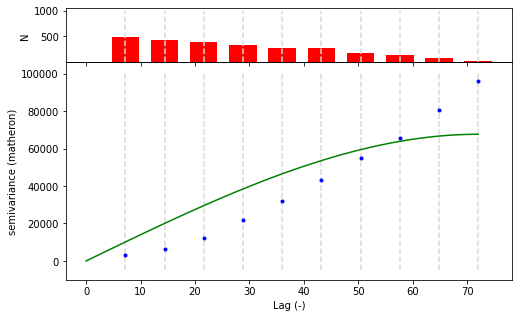

GDP, Real (1996) Dollars, billions
spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   72.00
Sill:              29436.78
Nugget:            0.00
        


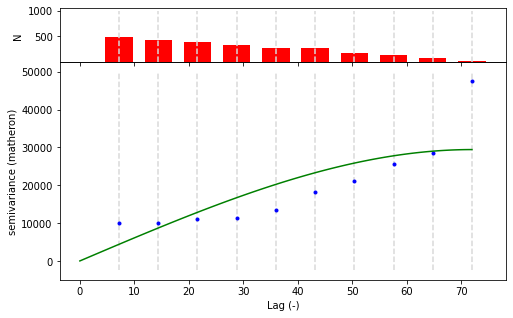

In [43]:
print("GDP, Current Dollars, billions")
v_curr_firstdiff = skg.Variogram(data_2_19_firstdiff.index.tolist(), data_2_19_firstdiff['GDP, Current Dollars, billions'].tolist())
print(v_curr_firstdiff)
v_curr_firstdiff.plot()
plt.show()
print("GDP, Real (1996) Dollars, billions")
v_real_firstdiff = skg.Variogram(data_2_19_firstdiff.index.tolist(), data_2_19_firstdiff['GDP, Real (1996) Dollars, billions'].tolist())
print(v_real_firstdiff)
v_real_firstdiff.plot()
plt.show()

**What impact has differencing had on the time series?**

...